# Basic Tabular Mining Tips

---
In this short tutorial, we demontrate how to perform a simple data mining task on the "Kicked!" dataset.

We will be covering:



1.   Data Preprocessing using Pandas.
2.   Some basic ideas in feature engineering.
3.   Basic parameter tuning for tree models. 



In [ ]:
!pip install lightgbm xgboost catboost category-encoders sklearn pandas==1.1.5

     |████████████████████████████████| 66.3MB 105kB/s 
     |████████████████████████████████| 81kB 7.1MB/s 


In [ ]:
!git clone https://github.com/tolarteh/cardashians.git

Cloning into 'cardashians'...
remote: Enumerating objects: 64, done.
remote: Total 64 (delta 0), reused 0 (delta 0), pack-reused 64
Unpacking objects: 100% (64/64), done.


In [ ]:
import pandas as pd
import numpy as np

x_train = pd.read_csv('./cardashians/xtrain.csv', engine='python')
x_test = pd.read_csv('./cardashians/xtest.csv', engine='python')

y_train = pd.read_csv('./cardashians/ytrain.csv', engine='python')
y_test = pd.read_csv('./cardashians/ytest.csv', engine='python')

In [ ]:
TRAIN_IDX=x_train.shape[0]
TEST_IDX = TRAIN_IDX + x_test.shape[0]

In [ ]:
x = pd.concat([x_train, x_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

data = pd.concat([x, y], axis=1)

In [ ]:
data.columns.to_list()

['VehicleAge',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'Auction_ADESA',
 'Auction_MANHEIM',
 'Auction_OTHER',
 'Make_ACURA',
 'Make_BUICK',
 'Make_CADILLAC',
 'Make_CHEVROLET',
 'Make_CHRYSLER',
 'Make_DODGE',
 'Make_FORD',
 'Make_GMC',
 'Make_HONDA',
 'Make_HUMMER',
 'Make_HYUNDAI',
 'Make_INFINITI',
 'Make_ISUZU',
 'Make_JEEP',
 'Make_KIA',
 'Make_LEXUS',
 'Make_LINCOLN',
 'Make_MAZDA',
 'Make_MERCURY',
 'Make_MINI',
 'Make_MITSUBISHI',
 'Make_NISSAN',
 'Make_OLDSMOBILE',
 'Make_PLYMOUTH',
 'Make_PONTIAC',
 'Make_SATURN',
 'Make_SCION',
 'Make_SUBARU',
 'Make_SUZUKI',
 'Make_TOYOTA',
 'Make_TOYOTA SCION',
 'Make_VOLKSWAGEN',
 'Make_VOLVO',
 'Color_BEIGE',
 'Color_BLACK',
 'Color_BLUE',

## Basic Data Manipulation

Let us see how we can do some basic data preprocessing

In [ ]:
data['IsBadBuy'].unique()

array([0, 1])

In [ ]:
data['IsBadBuy'].value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

In [ ]:
cont_col = ['VehicleAge',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VehBCost',
 'WarrantyCost']

dis_col = list(set(x.columns.to_list())-set(cont_col))

In [ ]:
# Basic selection
data['VehicleAge'][data['VehicleAge']>3].count()

45503

In [ ]:
# Or we can do this.
data.loc[data['VehicleAge']>3, 'VehicleAge'].count()

45503

In [ ]:
# Let us see multiple columns; pay close attention to the syntax
data.loc[(data['VehOdo'] > 5000)&(data['VehicleAge']>3), ['VehOdo', 'VehicleAge']]

,VehOdo,VehicleAge
1,84095,4
3,73746,6
4,81897,7
8,76429,7
10,73260,6
...,...,...
14589,72266,6
14590,76158,5
14591,84025,5
14595,54282,5


In [ ]:
# Select by indices
data.iloc[0:100, 0:2]

,VehicleAge,VehOdo
0,2,75645
1,4,84095
2,3,51780
3,6,73746
4,7,81897
...,...,...
95,4,88650
96,8,86059
97,9,82417
98,8,86206


In [ ]:
# This is deprecated! 
### data.ix[0:10]

In [ ]:
# Map function

data.iloc[:, 0].map(lambda x: 0 if x > 10 else 1)
data.iloc[:, 0].apply(lambda x: 0 if x > 10 else 1)

0        1
1        1
2        1
3        1
4        1
        ..
14592    1
14593    1
14594    1
14595    1
14596    1
Name: VehicleAge, Length: 72983, dtype: int64

In [ ]:
# Group-by operations

In [ ]:
data[['VehicleAge', 'IsBadBuy']].groupby('IsBadBuy', as_index=False).agg('mean')

,VehicleAge
IsBadBuy,
0,4.069461
1,4.940954


In [ ]:
### Pay attention when we want to perform the groupby and aggregation over several ops
aggregated = data[['VehicleAge', 'IsBadBuy']].groupby('IsBadBuy', as_index=False).agg(['mean','sum'])
aggregated

VehicleAge        
               mean     sum
IsBadBuy                   
0          4.069461  260474
1          4.940954   44350

In [ ]:
aggregated.columns

MultiIndex([('VehicleAge', 'mean'),
            ('VehicleAge',  'sum')],
           )

In [ ]:
[col[1] for col in aggregated.columns]

['mean', 'sum']

In [ ]:
### Custom aggregation functions
data[['VehicleAge', 'IsBadBuy']].groupby('IsBadBuy', as_index=False).agg([np.sum, np.mean])

VehicleAge          
                sum      mean
IsBadBuy                     
0            260474  4.069461
1             44350  4.940954

### Use Joins

In [ ]:
aggregated = data[['VehicleAge', 'IsBadBuy']].groupby('IsBadBuy', as_index=False).agg('mean')

In [ ]:
aggregated

,IsBadBuy,VehicleAge
0,0,4.069461
1,1,4.940954


In [ ]:
merge = data.merge(aggregated, how='left', on='IsBadBuy')

In [ ]:
merge.head()

,VehicleAge_x,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost,IsOnlineSale,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,...,VNST_AL,VNST_AR,VNST_AZ,VNST_CA,VNST_CO,VNST_FL,VNST_GA,VNST_IA,VNST_ID,VNST_IL,VNST_IN,VNST_KY,VNST_LA,VNST_MA,VNST_MD,VNST_MI,VNST_MN,VNST_MO,VNST_MS,VNST_NC,VNST_NE,VNST_NH,VNST_NJ,VNST_NM,VNST_NV,VNST_NY,VNST_OH,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WI,VNST_WV,IsBadBuy,VehicleAge_y
0,2,75645,8337.0,9645.0,12659.0,13621.0,8201.0,9792.0,12002.0,13607.0,1191,7955.0,1,1272,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.069461
1,4,84095,8829.0,10387.0,10035.0,11718.0,8987.0,10565.0,10206.0,11910.0,19662,7010.0,0,1633,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.069461
2,3,51780,6003.0,6904.0,6983.0,7956.0,6517.0,7437.0,7538.0,8532.0,20740,6710.0,0,671,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4.069461
3,6,73746,5438.0,6804.0,8608.0,9687.0,4086.0,5559.0,7708.0,8821.0,21973,6650.0,0,1272,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.069461
4,7,81897,1911.0,2753.0,2564.0,3473.0,1367.0,2128.0,1976.0,2798.0,18880,4100.0,0,1543,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4.069461


## Plotting with Matplotlib
---
Let us use `matplotlib` to draw some commonly used graphs, such as Line Chart, scatter plots, histograms, box plots,

In [ ]:
!pip install matplotlib

### Linechart

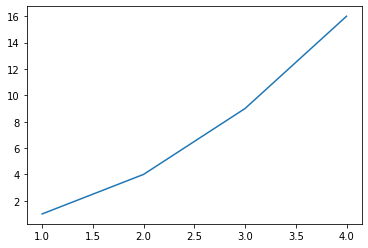

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = [1, 2, 3, 4]
y_axis = [1, 4, 9, 16]
plt.plot(x_axis,y_axis)
plt.show()

Scatter plot

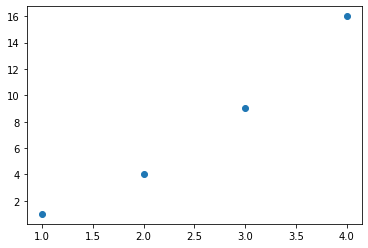

In [ ]:
x_axis = [1, 2, 3, 4]
y_axis = [1, 4, 9, 16]
plt.scatter(x_axis,y_axis)
plt.show()

### Histograms

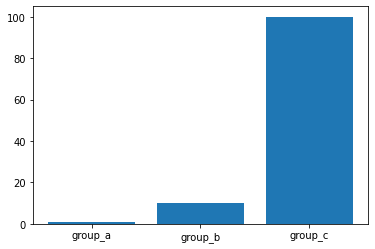

In [ ]:
x_axis = ['group_a', 'group_b', 'group_c']
y_axis = [1, 10, 100]

plt.bar(x_axis, y_axis)
plt.show()

### Boxplot

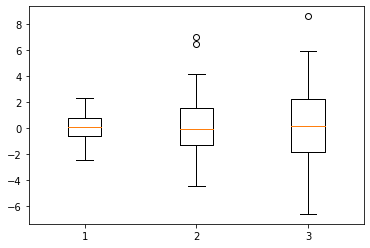

In [ ]:
datas = [np.random.normal(0,std,100) for std in range(1,4)]

plt.boxplot(datas) 
plt.show()

## Generating Features

---
1. By meaning.
2. Common encoders. 
3. EDA and bad case analysis. 


## By meaning

---
There is no such thing as a gaurrenteed approach to feature engineering. However, this is what I like to do.

1. Find as many as features as possible. 
2. Look into the features and see whether they can be grouped. Find as many as ways to classify these features as possible.
3. Look into the opposite of classifications and see whether we can create features.

*Let us try with the data dictionary*

## Common encoders

---
There are many commonly used encoders. Based on the characteristics of the data. They can be grouped into several category.

1. Continuous variables. The result is either a continuous variable or a discrete one.
2. Discrete variables. This is the most interesting one. 
3. Continuous and discrete. Basically groupby operations.
4. Discrete and discrete. Interactions. 

## EDA and Badcase Analysis

---
There are quite a lot of things one can see from data. The most important thing is to find "weird" things that should not be there, thus inferring the properties of the dataset. 

EDA, however, has a huge problem. It is essentially impossible to visualize multiple dimensions. That is to say it is very difficult to find interactions. 

Therefore, bad case analysis might be more benificial. SHAP values might help you explain what the model thinks (for an intro, see [here](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)). We will not delve into too much details here. 

## TreeBased Models  

---
In this example, we use lightgbm as the tree model of choice.

In [ ]:
train = data.iloc[:TRAIN_IDX, :]
test = data.iloc[TRAIN_IDX:TEST_IDX, :]

In [ ]:
import lightgbm as lgb
train_dataset = lgb.Dataset(train.drop(columns='IsBadBuy'), train['IsBadBuy'])
test_dataset = lgb.Dataset(test.drop(columns='IsBadBuy'), test['IsBadBuy'])

In [ ]:
param = {'num_leaves': 31, 'objective': 'binary', 'metric':'binary_error'}
num_round = 2000

In [ ]:
model = lgb.train(param, train_dataset, num_boost_round=num_round, valid_sets=[train_dataset, test_dataset])

## A Wrapper

In [ ]:
import io
import multiprocessing
from contextlib import redirect_stdout
from copy import deepcopy
from dataclasses import dataclass, asdict
import hyperopt.pyll
from hyperopt import fmin, tpe, hp
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import torch

import copy
cpu_count = 4
use_gpu = False
@dataclass
class LGBOpt:
    num_threads: any = hp.choice('num_threads', [cpu_count])
    num_leaves: any = hp.choice('num_leaves', [64])
    metric: any = hp.choice('metric', ['binary_error'])
    num_round: any = hp.choice('num_rounds', [1000])
    objective: any = hp.choice('objective', ['binary'])
    learning_rate: any = hp.uniform('learning_rate', 0.01, 0.1)
    feature_fraction: any = hp.uniform('feature_fraction', 0.5, 1.0)
    bagging_fraction: any = hp.uniform('bagging_fraction', 0.8, 1.0)
    device_type: any = hp.choice('device_tpye', ['gpu']) if use_gpu else hp.choice('device_type',
                                                                                   ['cpu'])
    boosting: any = hp.choice('boosting', ['gbdt', 'dart', 'goss'])
    extra_trees: any = hp.choice('extra_tress', [False, True])
    drop_rate: any = hp.uniform('drop_rate', 0, 0.2)
    uniform_drop: any = hp.choice('uniform_drop', [True, False])
    lambda_l1: any = hp.uniform('lambda_l1', 0, 10)  # TODO: Check range
    lambda_l2: any = hp.uniform('lambda_l2', 0, 10)  # TODO: Check range
    min_gain_to_split: any = hp.uniform('min_gain_to_split', 0, 1)  # TODO: Check range
    min_data_in_bin = hp.choice('min_data_in_bin', [3, 5, 10, 15, 20, 50])

    @staticmethod
    def get_common_params():
        return {'num_thread': 4, 'num_leaves': 12, 'metric': 'binary', 'objective': 'binary',
                'num_round': 1000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
    

In [ ]:
class FitterBase(object):
    def __init__(self, label, metric, max_eval=100, opt=None):
        self.label = label
        self.metric = metric
        self.opt_params = dict()
        self.max_eval = max_eval
        self.opt = opt

    def get_loss(self, y, y_pred):
        if self.metric == 'error':
            return 1 - accuracy_score(y, y_pred)
        elif self.metric == 'precision':
            return 1 - precision_score(y, y_pred)
        elif self.metric == 'recall':
            return 1 - recall_score(y, y_pred)
        elif self.metric == 'macro_f1':
            return 1 - f1_score(y, y_pred, average='macro')
        elif self.metric == 'micro_f1':
            return 1 - f1_score(y, y_pred, average='micro')
        elif self.metric == 'auc':  # TODO: Add a warning checking if y_predict is all [0, 1], it should be probability
            return 1 - roc_auc_score(y, y_pred)
        else:
            raise Exception("Not implemented yet.")


In [ ]:
class LGBFitter(FitterBase):
    def __init__(self, label='label', metric='error', opt: LGBOpt = None, max_eval=100):
        super(LGBFitter, self).__init__(label, metric, max_eval)
        if opt is not None:
            self.opt = opt
        else:
            self.opt = LGBOpt()
        self.best_round = None
        self.clf = None

    def train(self, train_df, eval_df, params=None, use_best_eval=True):
        self.best_round = None
        dtrain = lgb.Dataset(train_df.drop(columns=[self.label]), train_df[self.label])
        deval = lgb.Dataset(eval_df.drop(columns=[self.label]), eval_df[self.label])
        evallist = [dtrain, deval]
        if params is None:
            use_params = deepcopy(self.opt_params)
        else:
            use_params = deepcopy(params)

        num_round = use_params.pop('num_round')
        if use_best_eval:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            min_error = np.inf
            min_index = 0
            for idx in range(len(output) - 1):
                if len(output[idx].split("\t")) == 3:
                    temp = float(output[idx].split("\t")[2].split(":")[1])
                    if min_error > temp:
                        min_error = temp
                        min_index = int(output[idx].split("\t")[0][1:-1])
            print("The minimum is attained in round %d" % (min_index + 1))
            self.best_round = min_index + 1
            return output
        else:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            self.best_round = num_round
            return output

    def search(self, train_df, eval_df, use_best_eval=True):
        self.opt_params = dict()

        def train_impl(params):
            self.train(train_df, eval_df, params, use_best_eval)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            return self.get_loss(eval_df[self.label], y_pred)

        self.opt_params = fmin(train_impl, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    def search_k_fold(self, k_fold, data, use_best_eval=True):
        self.opt_params = dict()

        def train_impl_nfold(params):
            loss = list()
            for train_id, eval_id in k_fold.split(data):
                train_df = data.loc[train_id]
                eval_df = data.loc[eval_id]
                self.train(train_df, eval_df, params, use_best_eval)
                if self.metric == 'auc':
                    y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
                else:
                    y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                               num_iteration=self.best_round) > 0.5).astype(int)
                loss.append(self.get_loss(eval_df[self.label], y_pred))
            return np.mean(loss)

        self.opt_params = fmin(train_impl_nfold, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    def train_k_fold(self, k_fold, train_data, test_data, params=None, drop_test_y=True, use_best_eval=True):
        acc_result = list()
        train_pred = np.empty(train_data.shape[0])
        test_pred = np.empty(test_data.shape[0])
        if drop_test_y:
            dtest = test_data.drop(columns=self.label)
        else:
            dtest = test_data

        models = list()
        for train_id, eval_id in k_fold.split(train_data):
            train_df = train_data.loc[train_id]
            eval_df = train_data.loc[eval_id]
            self.train(train_df, eval_df, params, use_best_eval)
            models.append(copy.deepcopy(self.clf))
            train_pred[eval_id] = self.clf.predict(eval_df.drop(columns=self.label), num_iteration=self.best_round)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            acc_result.append(self.get_loss(eval_df[self.label], y_pred))
            test_pred += self.clf.predict(dtest, num_iteration=self.best_round)
        test_pred /= k_fold.n_splits
        return train_pred, test_pred, acc_result, models

In [ ]:
fitter = LGBFitter(label='IsBadBuy')

In [ ]:
params = {'num_thread': 4, 'num_leaves': 12, 'metric': 'binary', 'objective': 'binary',
                'num_round': 2000, 'learning_rate': 0.02, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [ ]:
fitter.train_k_fold(kfold, train, test, params = params)

The minimum is attained in round 1602
The minimum is attained in round 1586
The minimum is attained in round 1252
The minimum is attained in round 1342
The minimum is attained in round 1549


(array([0.03903925, 0.09390149, 0.06374577, ..., 0.04602956, 0.02993701,
        0.05449825]),
 array([0.15573416, 0.11875246, 0.0132512 , ..., 0.11031787, 0.07840101,
        0.14609521]),
 [0.10224353485185822,
  0.09694270788729986,
  0.09788473066712344,
  0.1022522908281237,
  0.09994005309582943],
  <lightgbm.basic.Booster at 0x7f4dfebab198>])